In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from ExKMCbundle.ExKMC.Tree import Tree
from ExKMCbundle.notebooks.utils import plot_tree_boundary, plot_kmeans
from utils import Mean_Split
%matplotlib inline

In [6]:
n = 100
d = 2
k = 2

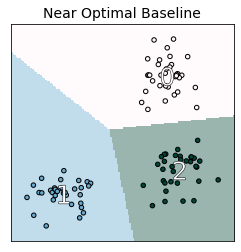

In [9]:
X, _ = make_blobs(n_samples=n, n_features=d, centers=k)
kmeans = KMeans(k)
kmeans.fit(X)

plot_kmeans(kmeans, X)

In [10]:
teste = Mean_Split(X, dims=d, n_clusters=k)
teste.find_all_splits()
teste.plot_optimal_split()

AttributeError: 'NoneType' object has no attribute 'split_point'

In [ ]:
tree = Tree(k=k, max_leaves=2*k) 

prediction = tree.fit_predict(X, kmeans=kmeans)

# # Tree plot saved to filename
tree.plot('test')

In [ ]:
plot_tree_boundary(tree, d, X, kmeans, plot_mistakes=True)